In [1]:
import numpy as np
import pandas as pd
import glob
import os
from plotnine import *
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('D:/Summer Practicum/1_Data/training.csv')

C:\Users\izhang\AppData\Local\Temp\10\ipykernel_18036\3517558401.py:1: DtypeWarning: Columns (11,13,86,93) have mixed types. Specify dtype option on import or set low_memory=False.


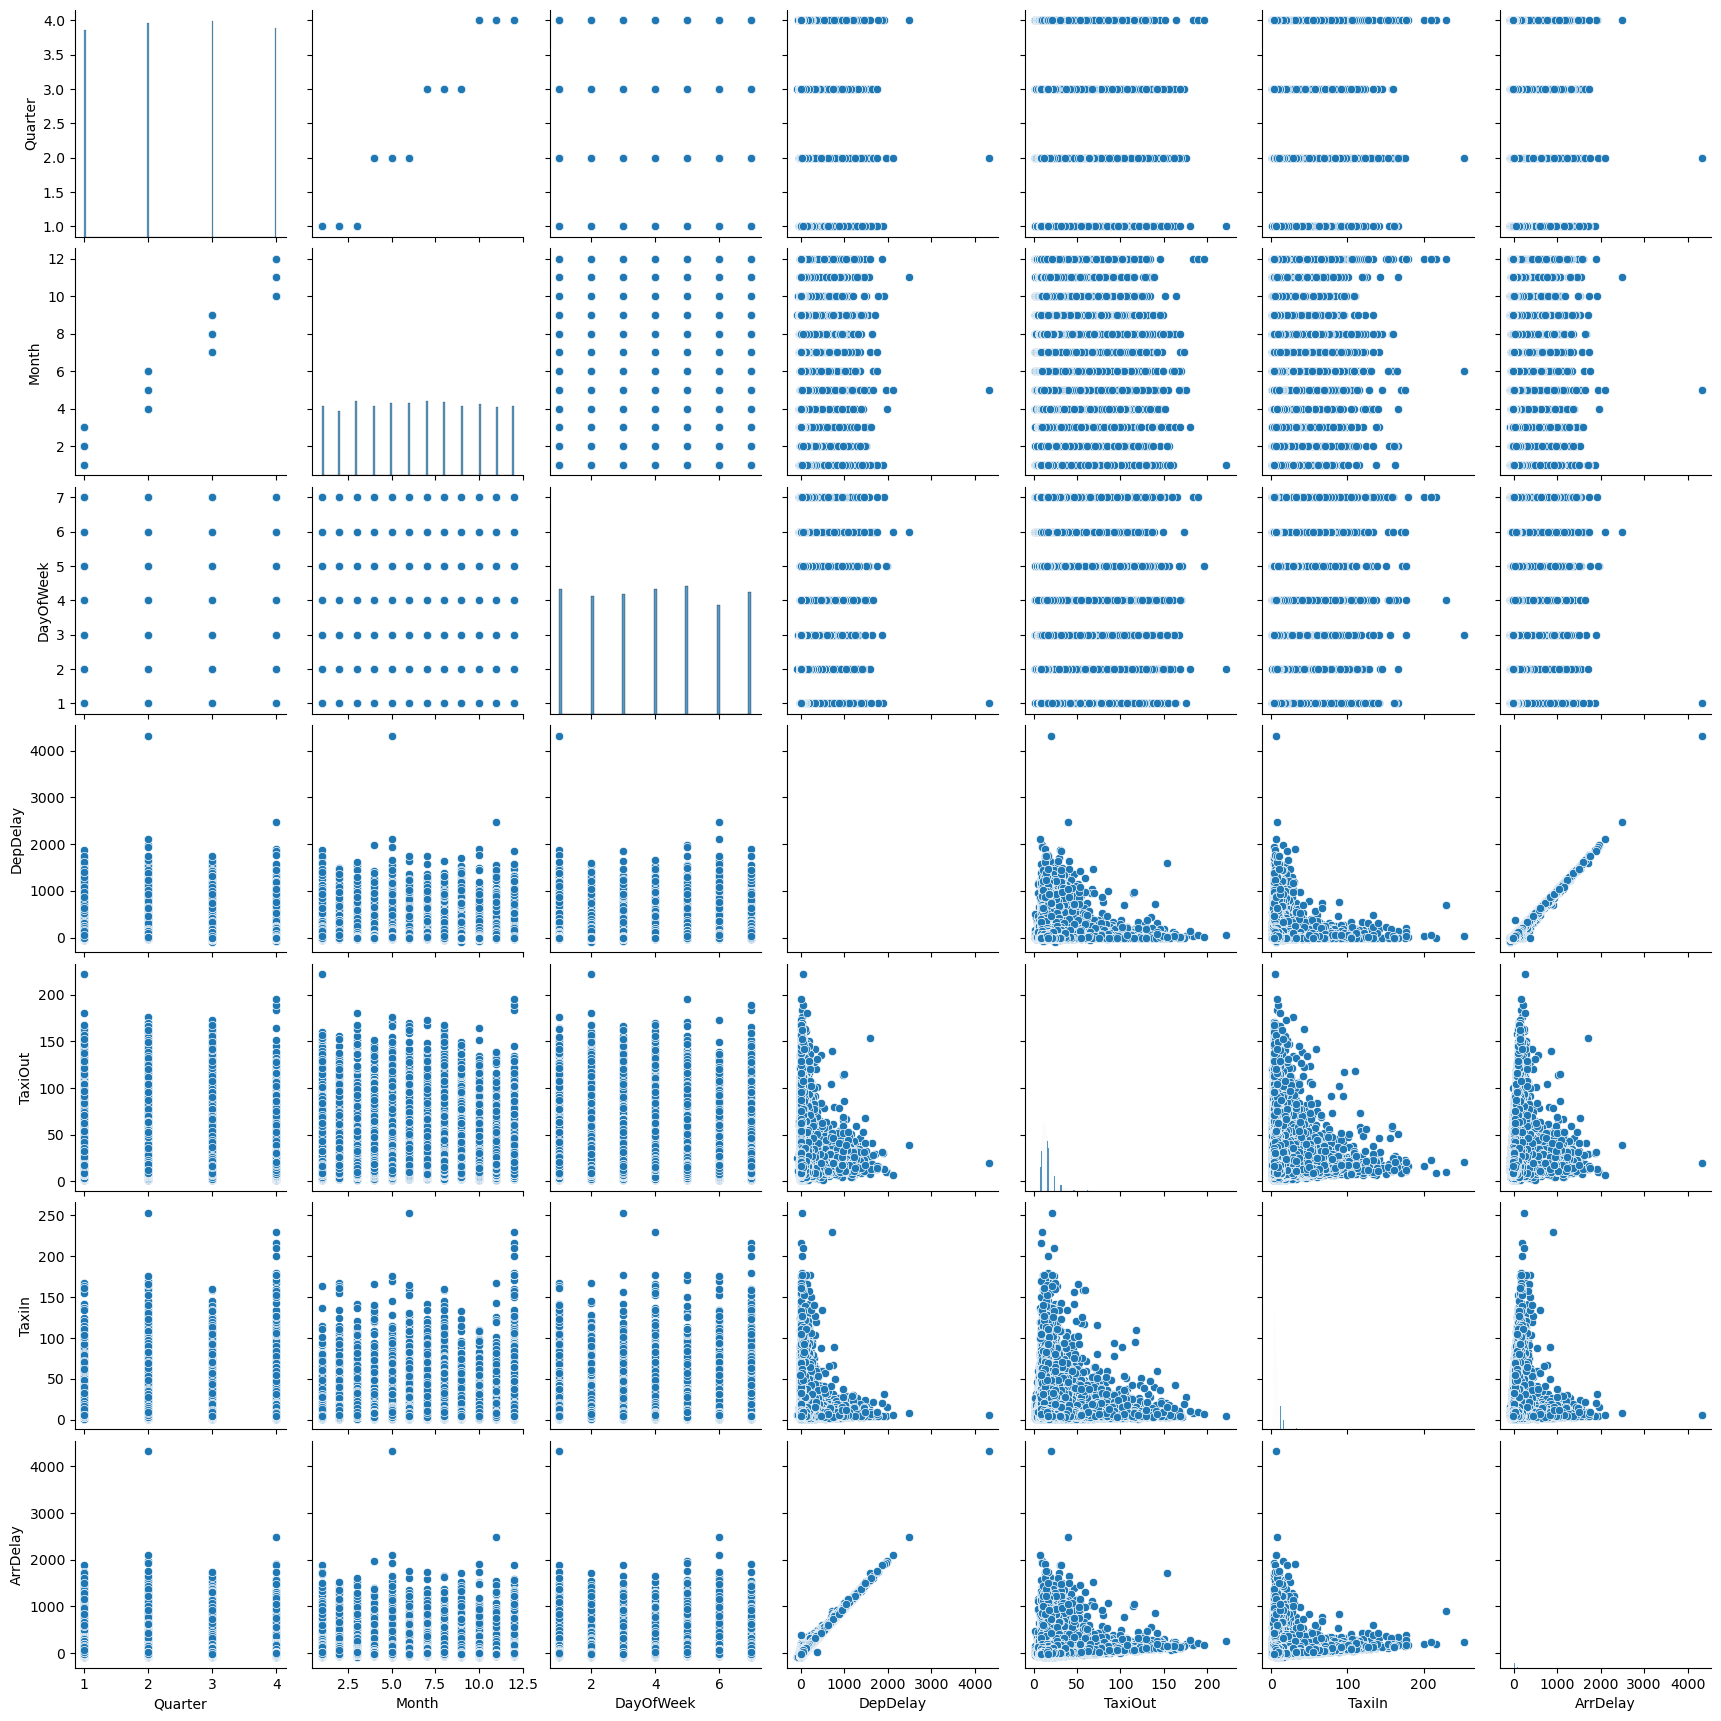

In [38]:
df_pairplot = df[['Quarter','Month','DayOfWeek','IATA_Code_Marketing_Airline', 'Origin','OriginCityName','OriginState','Dest','DestCityName','DestStateName','DepDelay','TaxiOut','TaxiIn','ArrDelay']]

sns.pairplot(df_pairplot)

In [63]:
df.head()

,Year,Quarter,Month,DayofMonth,DayOfWeek,FlightDate,Marketing_Airline_Network,Operated_or_Branded_Code_Share_Partners,DOT_ID_Marketing_Airline,IATA_Code_Marketing_Airline,...,Div5Airport,Div5AirportID,Div5AirportSeqID,Div5WheelsOn,Div5TotalGTime,Div5LongestGTime,Div5WheelsOff,Div5TailNum,Duplicate,Unnamed: 119
0,2022,3,9,26,1,2022-09-26,AA,AA_CODESHARE,19805,AA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN
1,2022,4,10,22,6,2022-10-22,AA,AA,19805,AA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN
2,2022,3,8,11,4,2022-08-11,DL,DL_CODESHARE,19790,DL,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN
3,2022,2,4,8,5,2022-04-08,AA,AA,19805,AA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN
4,2023,1,1,29,7,2023-01-29,DL,DL,19790,DL,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN


In [ ]:
top_10_airports=['ATL','DFW','DEN','ORD','LAX','CLT','MCO','LAS','PHX','MIA']
df_top_10 = df[((df['Origin'].isin(top_10_airports)) | (df['Dest'].isin(top_10_airports)))]

,Year,Quarter,Month,DayofMonth,DayOfWeek,FlightDate,Marketing_Airline_Network,Operated_or_Branded_Code_Share_Partners,DOT_ID_Marketing_Airline,IATA_Code_Marketing_Airline,...,Div5Airport,Div5AirportID,Div5AirportSeqID,Div5WheelsOn,Div5TotalGTime,Div5LongestGTime,Div5WheelsOff,Div5TailNum,Duplicate,Unnamed: 119
0,2022,3,9,26,1,2022-09-26,AA,AA_CODESHARE,19805,AA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN
1,2022,4,10,22,6,2022-10-22,AA,AA,19805,AA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN
3,2022,2,4,8,5,2022-04-08,AA,AA,19805,AA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN
4,2023,1,1,29,7,2023-01-29,DL,DL,19790,DL,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN
6,2022,2,5,23,1,2022-05-23,UA,UA,19977,UA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
706555,2022,4,11,2,3,2022-11-02,UA,UA,19977,UA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN
706557,2022,4,12,19,1,2022-12-19,AA,AA,19805,AA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN
706559,2023,1,2,4,6,2023-02-04,AA,AA,19805,AA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN
706560,2022,3,8,12,5,2022-08-12,AA,AA,19805,AA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN


In [ ]:
sns.catplot(data=df,x='Origin',y='TaxiOut',kind='box')

In [ ]:
df_by_airport = df.groupby(['Origin'])

Origin
ABE     489
ABI     167
ABQ    2159
ABR      75
ABY      99
       ... 
XNA    1245
XWA     154
YAK      78
YKM      54
YUM     171
Length: 372, dtype: int64

In [55]:
# Frequency by Origin and Dest. Airport
frequent_by_origin = df.groupby(['Origin']).size().reset_index().rename(columns={0:'count'}).sort_values(by='count',ascending=False)
frequent_by_dest = df.groupby(['Dest']).size().reset_index().rename(columns={0:'count'}).sort_values(by='count',ascending=False)
print(frequent_by_origin.nlargest(10,'count'))
print(frequent_by_dest.nlargest(10,'count'))

    Origin  count
23     ATL  32376
253    ORD  29350
96     DEN  28639
97     DFW  27728
74     CLT  21079
195    LAX  19112
193    LAS  18397
316    SEA  17458
204    LGA  17143
268    PHX  16899
    Dest  count
23   ATL  32047
254  ORD  29447
96   DEN  28453
97   DFW  28083
74   CLT  21389
195  LAX  19121
193  LAS  18343
317  SEA  17345
204  LGA  16946
269  PHX  16834


In [59]:
# Which routes are the most frequent?
# Pair flights by origin and destination 
frequent_routes = df.groupby(['Origin','Dest']).size().reset_index().rename(columns={0:'count'}).sort_values(by='count',ascending=False)
frequent_routes['Route'] = frequent_routes['Origin'].astype(str)+'-->'+frequent_routes['Dest'].astype(str)

# Plot top 10 routes
top_10_routes = (frequent_routes[['Route','count']].nlargest(20,'count'))
print(top_10_routes)
print(top_10_routes.describe())
"""sns.barplot(data=top_10_routes,x='Route',y='count',hue='Route',palette='spring')
plt.xticks(rotation=45,ha="right")
plt.title("Total Flights per route")
plt.tight_layout()
plt.show()"""


          Route  count
4370  OGG-->HNL   1204
4566  ORD-->LGA   1187
3410  LAX-->SFO   1180
5915  SFO-->LAX   1158
2608  HNL-->OGG   1153
3529  LGA-->ORD   1134
3253  LAS-->LAX   1123
723   BOS-->DCA   1116
1447  DCA-->BOS   1115
3369  LAX-->LAS   1071
3115  JFK-->LAX   1070
3367  LAX-->JFK   1002
1630  DEN-->LAS    896
3481  LGA-->BOS    889
4958  PHX-->DEN    871
3222  LAS-->DEN    864
745   BOS-->LGA    860
1670  DEN-->PHX    838
4778  PDX-->SEA    808
5780  SEA-->PDX    807
             count
count    20.000000
mean   1017.300000
std     144.970814
min     807.000000
25%     869.250000
50%    1070.500000
75%    1138.750000
max    1204.000000


'sns.barplot(data=top_10_routes,x=\'Route\',y=\'count\',hue=\'Route\',palette=\'spring\')\nplt.xticks(rotation=45,ha="right")\nplt.title("Total Flights per route")\nplt.tight_layout()\nplt.show()'

In [57]:
#Total flights by Airport
total_flights = df.groupby('Origin')['Flights'].sum()

#Total Cancellations and Diversions by Airport
cancel_by_airport = pd.DataFrame(df.groupby('Origin')['Cancelled'].sum())
diversion_by_airport = pd.DataFrame(df.groupby('Origin')['Diverted'].sum())
combined_cancel_divert = pd.merge(cancel_by_airport,diversion_by_airport,left_index=True,right_index=True).reset_index()
combined_cancel_divert['Total Cancelled or Diverted'] = combined_cancel_divert['Cancelled'] + combined_cancel_divert['Diverted']

top_10_cancel_divert = combined_cancel_divert.sort_values(by='Total Cancelled or Diverted',ascending=False)
avg_cancel_divert = combined_cancel_divert['Total Cancelled or Diverted'].mean()

#merged_cancel_divert = combined_cancel_divert[]

#merged_cancel_divert['Cancelled or Diverted per Flight'] = combined_cancel_divert['Total Cancelled or Diverted']
print(top_10_cancel_divert.nlargest(10,'Total Cancelled or Diverted'))
print(f"Mean number of airport cancel divert: {avg_cancel_divert}")

    Origin  Cancelled  Diverted  Total Cancelled or Diverted
97     DFW      644.0      83.0                        727.0
204    LGA      656.0      42.0                        698.0
253    ORD      591.0      61.0                        652.0
96     DEN      580.0      66.0                        646.0
120    EWR      539.0      24.0                        563.0
217    MCO      458.0      35.0                        493.0
93     DCA      442.0      34.0                        476.0
23     ATL      394.0      50.0                        444.0
74     CLT      366.0      58.0                        424.0
184    JFK      367.0      41.0                        408.0
Mean number of airport cancel divert: 44.973118279569896


In [6]:
#Taxi Times by Airport 
taxi_in = df.groupby('Origin')['TaxiIn'].mean().reset_index().sort_values(by='TaxiIn',ascending=False)
taxi_out = df.groupby('Origin')['TaxiOut'].mean().reset_index().sort_values(by='TaxiOut',ascending=False)
print(taxi_out)
print(taxi_in)

    Origin    TaxiOut
184    JFK  26.170657
204    LGA  25.239993
152    GUC  25.136842
120    EWR  24.461378
22     ASE  22.731132
..     ...        ...
166    HYA   8.000000
257    OTZ   7.790323
365    WRG   7.658824
370    YKM   7.076923
173    ILG   5.000000

[372 rows x 2 columns]
    Origin     TaxiIn
41     BKG  22.333333
277    PQI  17.557692
173    ILG  17.000000
16     ALS  16.411765
230    MKG  14.480000
..     ...        ...
365    WRG   4.211765
356    TWF   4.203704
334    SPN   4.090909
281    PSG   4.073529
149    GST   3.750000

[372 rows x 2 columns]


In [23]:
merged_taxi = pd.merge(taxi_in, taxi_out, on="Origin")
merged_taxi['Total Taxi Time'] = merged_taxi["TaxiIn"] + merged_taxi["TaxiOut"]
print(merged_taxi.sort_values('Total Taxi Time',ascending=False))
print(merged_taxi.describe())

    Origin     TaxiIn    TaxiOut  Total Taxi Time
1      PQI  17.557692  22.365385        39.923077
233    JFK   8.217990  26.170657        34.388647
180    GUC   9.021053  25.136842        34.157895
21     LNK  12.431193  21.454128        33.885321
239    LGA   8.162147  25.239993        33.402140
..     ...        ...        ...              ...
366    BRW   4.250000   9.861111        14.111111
364    OME   4.349206   9.746032        14.095238
359    AKN   5.142857   8.428571        13.571429
355    OTZ   5.370968   7.790323        13.161290
367    WRG   4.211765   7.658824        11.870588

[372 rows x 4 columns]
           TaxiIn     TaxiOut  Total Taxi Time
count  372.000000  372.000000       372.000000
mean     9.079472   15.113677        24.193149
std      2.274901    3.067707         4.203430
min      3.750000    5.000000        11.870588
25%      7.634092   13.195211        21.467774
50%      8.968869   14.986710        24.575056
75%     10.513595   16.983093        26.713398
